In [1]:
from sklearn.feature_extraction.text import CountVectorizer

# 예시 문서
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# CountVectorizer 객체 생성
vectorizer = CountVectorizer()

# 문서를 토큰화하고 단어-문서 행렬 생성
X = vectorizer.fit_transform(documents)

# 행렬의 내용을 확인
print("단어-문서 행렬:")
print(X.toarray())

# 각 열에 대응하는 단어 확인
print("각 열에 대응하는 단어:")
print(vectorizer.get_feature_names_out())

단어-문서 행렬:
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
각 열에 대응하는 단어:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [2]:
!pip install requests

In [3]:
 import requests
# 저작권이 만료된 텍스트들을 모아놓은 구텐베르크 프로젝트(http://gutenberg.org)에서 그림 동화를 가져와보자
url = 'http://www.gutenberg.org/files/2591/2591-0.txt'
res = requests.get(url)
res.status_code

200

In [4]:
res.text[:1000]

'ï»¿The Project Gutenberg eBook of Grimmsâ\x80\x99 Fairy Tales, by Jacob Grimm and Wilhelm Grimm\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Grimmsâ\x80\x99 Fairy Tales\r\n\r\nAuthor: Jacob Grimm and Wilhelm Grimm\r\n\r\nTranslators: Edgar Taylor and Marian Edwardes\r\n\r\nRelease Date: April, 2001 [eBook #2591]\r\n[Most recently updated: June 28, 2021]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Emma Dudding, John Bickers, Dagny and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK GRIMMSâ\x80\x99 FAIRY TAL

In [5]:
res.text[:100] # 단어 백개 까지 확인 해봄

import re   # 문장 정규화 모듈 호출
words = re.findall(r'[a-zA-Z]+', res.text) 
# 알파벳만 남기고 삭제(특수문자, 줄바꿈 등)
words[:10]  # 단어 10개 확인


['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Grimms',
 'Fairy',
 'Tales',
 'by',
 'Jacob']

In [6]:
# 4.	 단어 세기
word_count = {}                # 사전을 만든다
for word in words:             # 모든 단어에 대해서
    word = word.lower()        # 단어를 소문자로 바꾼다
    if word in word_count:     # 사전에 단어가 있으면
        word_count[word] += 1  # 단어의 개수를 1 증가 시킨다
    else:                      # 없으면
        word_count[word] = 1   # 단어의 개수를 1로 한다

# ring이라는 단어가 몇 번 등장했는지 확인해보자.
print(word_count['ring'])

37


In [7]:
word_count.items()

dict_items([('the', 7232), ('project', 89), ('gutenberg', 97), ('ebook', 13), ('of', 1493), ('grimms', 6), ('fairy', 31), ('tales', 11), ('by', 323), ('jacob', 5), ('grimm', 8), ('and', 5551), ('wilhelm', 5), ('this', 373), ('is', 489), ('for', 777), ('use', 38), ('anyone', 28), ('anywhere', 3), ('in', 1224), ('united', 15), ('states', 19), ('most', 37), ('other', 147), ('parts', 2), ('world', 65), ('at', 633), ('no', 321), ('cost', 12), ('with', 752), ('almost', 10), ('restrictions', 2), ('whatsoever', 6), ('you', 1267), ('may', 98), ('copy', 12), ('it', 1325), ('give', 152), ('away', 295), ('or', 203), ('re', 4), ('under', 73), ('terms', 23), ('license', 18), ('included', 3), ('online', 4), ('www', 9), ('org', 9), ('if', 350), ('are', 243), ('not', 735), ('located', 7), ('will', 578), ('have', 510), ('to', 2751), ('check', 4), ('laws', 11), ('country', 30), ('where', 170), ('before', 179), ('using', 6), ('title', 1), ('author', 1), ('translators', 1), ('edgar', 3), ('taylor', 3), ('m

In [8]:
list(word_count.items())[:10]

[('the', 7232),
 ('project', 89),
 ('gutenberg', 97),
 ('ebook', 13),
 ('of', 1493),
 ('grimms', 6),
 ('fairy', 31),
 ('tales', 11),
 ('by', 323),
 ('jacob', 5)]

In [9]:
import pandas as pd
df = pd.DataFrame(list(word_count.items()), columns=['word', 'n'])

df.sort_values('n', ascending=False).head()


,word,n
0,the,7232
11,and,5551
54,to,2751
268,he,2096
229,a,1978


In [10]:
#단어 구름 그리기
# jupyter notebook에서는 그래프를 그리면 새 창으로 뜬다. 그래프를 노트북과 함께 저장하려면 아래 매직
#  명령으로 설정을 바꿔준다
%matplotlib inline


# 단어 구름을 그리기 위해서는 matplotlib와 wordcloud 패키지들을 불러오면 된다.
import matplotlib.pyplot as plt
from wordcloud import WordCloud


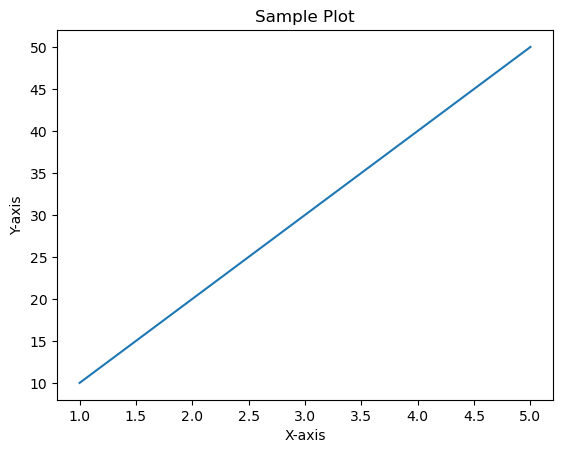

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]

plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sample Plot')
plt.show()

In [12]:
# 워드 클라우드는 딕셔너리 형태로 데이터를 받는다. 만약 단어(words)와 빈도(count)가 각각 리스트 형태로 있다면 짝지어 딕셔너리를 만들어준다.
word_count = dict(zip(df.word, df.n))
# 생성된 딕셔너리인 word_count를 확인해보자.
list(word_count.items())[:5]


[('the', 7232),
 ('project', 89),
 ('gutenberg', 97),
 ('ebook', 13),
 ('of', 1493)]

In [13]:
# WordCloud 함수에 배경색을 바꿀 수 있는 옵션인 backgroud_color는 'white'로 지정하고, 넓이는 400, 높이는 200 이라는 옵션을 넘겨주면서 틀을 생성한다.
wc = WordCloud(background_color='white', width=400, height=200)


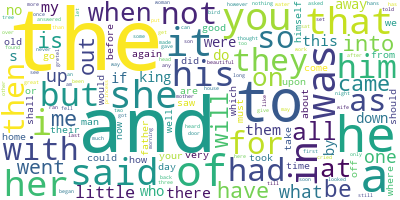

In [14]:
# 이제 워드 클라우드 틀을 생성하였으니 단어들을 넘겨준다. .fit_words()에 단어와 빈도수로 이루어진 딕셔너리를 넘겨준다.
cloud = wc.fit_words(word_count)

# cloud 변수의 그림을 노트북에 붙여 넣으려면 아래와 같이 한다.
cloud.to_image()


In [15]:
kor_wc = WordCloud(background_color='white', width=400, height=200,
                   font_path='gulim.ttf')


In [16]:
# 다음 뉴스 크롤링

import requests
res = requests.get('http://search.daum.net/search?w=news&cluster=n&q=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5&sort=recency')

In [17]:
res.text

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="pc unix ">\n    \n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n    <meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n    <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n    <meta name="autocomplete" content="off" />\n    <meta name="referrer" content="always">\n    <meta name="format-detection" content="telephone=no" />\n    <meta property="og:title" content="인공지능 &ndash; Daum 검색" />\n    <meta property="og:url" content="https://search.daum.net/search?w=news&amp;q=%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5" />\n    <meta property="og:description" content="Daum 검색에서 인공지능에 대한 최신정보를 찾아보세요." />\n    <meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" />\n    <meta property="og:site_name" content="다음검색" />\n    <title>인공지능 &ndash; Daum 검색</title>\n

In [19]:
import lxml.html
root = lxml.html.fromstring(res.text)


urls = []
for link in root.cssselect('a.f_nb'):
    urls.append(link.attrib['href'])   #URL 수집


In [20]:
urls[:10]

['https://v.daum.net/channel/11/home',
 'http://v.daum.net/v/20230910113108413',
 'https://v.daum.net/channel/5/home',
 'http://v.daum.net/v/20230910113005403',
 'http://www.ddaily.co.kr',
 'http://www.asiaa.co.kr',
 'https://v.daum.net/channel/21/home',
 'http://v.daum.net/v/20230910112503342',
 'http://www.newdaily.co.kr',
 'http://www.ebaekje.co.kr']

In [35]:
articles = [] 
for u in urls:
    if not u.startswith('http'):  #시작이 http로 시작하는지 체크
        continue
    res = requests.get(u)
    root = lxml.html.fromstring(res.text)   # URL의 텍스트 결과 값을 넘김
    # body = root.cssselect('.article_view').pop()  # pop를 통하여 마지막 불필요 부분 삭제
    article_views = root.cssselect('.article_view')
    if not article_views:
        continue  # skip to the next URL if no article_view element is found
    body = article_views.pop()  # pop를 통하여 마지막 불필요 부분 삭제
    content = body.text_content()
    articles.append(content)

In [42]:
articles[:2],len(articles)

([" \n         \n          ET라씨로는 인공지능(AI) 기반으로 선별·분석한 주식 정보와 종목 매매 신호를 제공하는 전자신문 증권 정보 애플리케이션입니다. 플레이스토어에서 'ET라씨로'(->바로가기)를 다운로드하면 IT기업 뉴스와 시장 현황, AI 매매 타이밍을 받아볼 수 있습니다.\n          \n           \n          \n          미코바이오메드가 480억원 규모의 유상증자를 발표하면서 급락하고 있다.\n          미코바이오메드(214610)는 8월 28일 오후 2시 15분 기준 전 거래일보다 14.65% 하락한 3,380원에 거래되고 있다.\n          25일 미코바이오메드는 공시를 통해 운영자금 190억6000만 원, 채무상환자금 290억 원 등 총 480억6000만 원 규모 유상증자를 결정했다고 밝혔다. 신주 발행가액은 2670원이며 상장 예정일은 11월 28일이다.\n          체외 진단 의료기기 업체인 미코바이오메드는 지난 2020년 코넥스에서 코스닥으로 이전 상장했다.\n          #미코바이오메드 #AI 매매신호 #실시간 매매타이밍 #알림 신청\n          이 기사는 전자신문과 금융 AI 전문기업 씽크풀이 공동으로 작성한 것입니다. AI를 기반으로 생성된 데이터에 기자의 취재 내용을 추가한 'AI 휴머노이드 기사'입니다.\n          ※ ET라씨로에서 실시간 속보 확인하기\n          전자신문인터넷 이원지 기자 news21g@etnews.com\n          \n        ",
  ' \n         \n          “적정 수준의 기술에만 만족하고, 새 시도는 하지 말걸 하는 후회가\xa0듭니다.”\n          \n           자율주행 순찰로봇 업체인 뉴빌리티의 이상민 대표가 28일 서울 서대문구\xa0연세대\xa0법학전문대학원 모의법정에서 열린 ‘모빌리티 분야 규제뽀개기 모의재판’에서 이 같은\xa0변론을 남겼

In [44]:
import pandas as pd
df = pd.DataFrame({'article': articles})
df.to_excel('기사.xlsx')
df

,article
0,\n \n ET라씨로는 인공지능(AI) 기반으로 선...
1,"\n \n “적정 수준의 기술에만 만족하고, 새 시..."
2,\n \n \n \n ...
3,\n \n \n \n ...
4,\n \n \n \n ...


In [59]:
## 7.2. 네이버 영화 별점 스크랩 – 네이버 무비 서비스 종료에 따른 프로그램 수정 


url = 'https://m.search.naver.com/p/csearch/content/nqapirender.nhn?where=nexearch&pkid=68&fileKey=movieKBPointAPI&u1=219673&_callback=_nexearch_where_68_pkid_movieKBPointAPI_fileKey_219673_u1_true_u5_newest_u3_false_u4_2_u2&u5=true&u3=newest&u4=false&u2={}'


In [60]:
import requests
import lxml.html


# 리뷰와 별점을 모을 빈 리스트를 만든다
reviews = []
scores = []


for page in range(1, 30):  # 1~29페이지까지 반복
    res = requests.get(url.format(page))  # 각 페이지에 접속한다
    root = lxml.html.fromstring(res.text.replace("\\n", "").replace("\\t", "").replace("\\", ""))   # html을 처리한다
	# 리뷰를 가져와 reviews에 추가한다
    for review in root.cssselect('.area_text_expand ._text'):
        reviews.append(review.text_content())


    # 별점을 가져와 scores에 추가한다
    for score in root.cssselect('.lego_movie_pure_star .area_text_box'):
        scores.append(score.text_content().replace("별점(10점 만점 중)", ""))


In [64]:
import pandas


df = pandas.DataFrame({'score': scores, 'review': reviews})
# 데이터 프레임을 CSV 파일로 저장한다.
df.to_csv('movie_review.csv', encoding='utf8', index=False)


review_start = pandas.read_csv('movie_review.csv',encoding='utf8')
# review_start['review']=df['review'].str.replace(pat=r'[^ A-Za-z0-9가-힣+]',repl= r'', regex=True)
# review_start.head()
review_start.head()

,score,review
0,8,시리즈의 마지막은 이렇게 끝나야함을 보여준다 특히 마지막 씬이 아름답고 여운이 남아...
1,8,다소 둔해진 키아누의 액션은 아쉬웠지만 존윅의 마지막 시리즈 마무리를 꼭 극장에서 ...
2,5,불필요하게 긴 러닝타임 영상미가 좋은 액션 영화
3,8,진부한 표현이지만 액션의 정수이자 액션의 황홀경이란 말이 딱 어울리는 영화였어요
4,7,다음 편 여지를 남겨 놓는데 또 나름대로 기대가 되네요.


In [65]:
review_start['review']=df['review'].str.replace(pat=r'[^ A-Za-z0-9가-힣+]',repl= r'', regex=True)
review_start.head()

,score,review
0,8,시리즈의 마지막은 이렇게 끝나야함을 보여준다 특히 마지막 씬이 아름답고 여운이 남아...
1,8,다소 둔해진 키아누의 액션은 아쉬웠지만 존윅의 마지막 시리즈 마무리를 꼭 극장에서 ...
2,5,불필요하게 긴 러닝타임 영상미가 좋은 액션 영화
3,8,진부한 표현이지만 액션의 정수이자 액션의 황홀경이란 말이 딱 어울리는 영화였어요
4,7,다음 편 여지를 남겨 놓는데 또 나름대로 기대가 되네요
